## I. Cài đặt và sử dụng pre-trained model

In [ ]:
# 1. Tải mã nguồn YOLOv10 từ GitHub
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20304, done.
remote: Counting objects: 100% (1347/1347), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 20304 (delta 1301), reused 1224 (delta 1220), pack-reused 18957
Receiving objects: 100% (20304/20304), 11.18 MiB | 15.00 MiB/s, done.
Resolving deltas: 100% (14304/14304), done.


In [ ]:
# 2. Cài đặt các thư viện cần thiết
# 3. Tải trọng số của pre-trained models
%cd yolov10
!pip install -q -r requirements . txt
!pip install -e .

/content/yolov10
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements'
Obtaining file:///content/yolov10
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.

In [ ]:
# 4. Khởi tạo mô hình
from ultralytics import YOLOv10 # type: ignore

MODEL_PATH = 'yolov10n.pt'
model = YOLOv10(MODEL_PATH)

In [ ]:
# 5. Tải ảnh cần dự đoán
!gdown '1tr9PSRRdlC2pNir7jsYugpSMG-7v32VJ' -O './images/'

Downloading...
From: https://drive.google.com/uc?id=1tr9PSRRdlC2pNir7jsYugpSMG-7v32VJ
To: /content/yolov10/images/HCMC_Street.jpg
100% 374k/374k [00:00<00:00, 4.48MB/s]



image 1/1 /content/yolov10/images/HCMC_Street.jpg: 448x640 11 persons, 2 bicycles, 1 car, 2 motorcycles, 17.1ms
Speed: 3.5ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


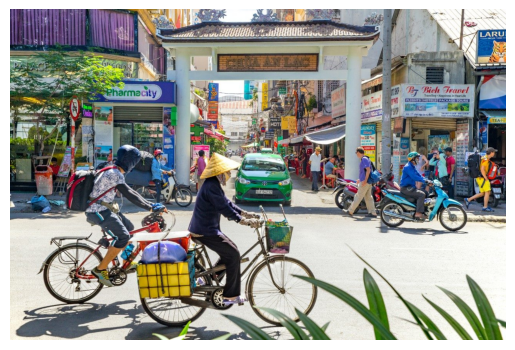

In [ ]:
# 6. Dự đoán
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

IMG_PATH = './images/HCMC_Street.jpg'

result = model(source = IMG_PATH)[0]
plt.imshow(mpimg.imread(IMG_PATH))
plt.axis('off')  # Tắt hiển thị trục
plt.show()

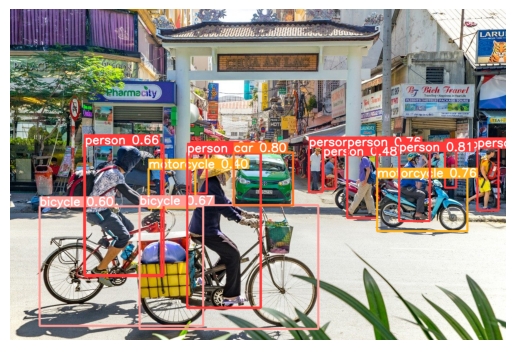

In [ ]:
# 7. Lưu kết quả dự đoán

result.save('./images/HCMC_Street_predict.png')

IMG_PATH_PRED = './images/HCMC_Street_predict.png'
plt.imshow(mpimg.imread(IMG_PATH_PRED))
plt.axis('off')  # Tắt hiển thị trục
plt.show()

In [ ]:
!pip install pytube

In [ ]:
from pytube import YouTube # type: ignore
import os
import cv2
import numpy as np

In [ ]:
# 8. Dự đoán youtube video

YOUTUBE_VIDEO_URL = 'https://www.youtube.com/watch?v=wqPSsu7XQ74'
yt = YouTube(YOUTUBE_VIDEO_URL)
stream = yt.streams.filter(progressive=True, file_extension='mp4').first()
input_path = '/content/yolov10/downloaded_video/input_video.mp4'
stream.download(output_path='/content/yolov10/downloaded_video', filename='input_video.mp4')

# Đọc video input
cap = cv2.VideoCapture(input_path)

# Lấy thông tin video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Tạo VideoWriter object để lưu video output
output_path = '/content/yolov10/downloaded_video/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Xử lý từng frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Xử lý frame bằng model
    results = model(frame)

    # Vẽ kết quả lên frame
    # Giả sử model trả về một đối tượng có phương thức plot()
    annotated_frame = results[0].plot()

    # Ghi frame đã xử lý vào video output
    out.write(annotated_frame)

# Giải phóng resources
cap.release()
out.release()

print(f"Video đã được xử lý và lưu tại: {output_path}")

# Tải xuống video output (nếu đang chạy trong Google Colab)
from google.colab import files # type: ignore
files.download(output_path)


0: 384x640 6 persons, 2 cars, 1 motorcycle, 1 bus, 1 traffic light, 18.1ms
Speed: 1.7ms preprocess, 18.1ms inference, 81.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 car, 2 motorcycles, 1 bus, 1 traffic light, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 car, 2 motorcycles, 1 bus, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1 car, 2 motorcycles, 1 bus, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 car, 3 motorcycles, 1 bus, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1 car, 1 motorcycle, 1 bus, 9.6ms
Speed: 0.9ms preprocess, 9.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 1 motorcycl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## II. huấn luyện mô hình YOLOv10 (fine-tuning) trên bộ dữ liệu Helmet Safety Detection

In [ ]:
# Tải bộ dữ liệu
import locale
locale.getpreferredencoding = lambda: "UTF-8"

#!gdown '1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R'
#!mkdir safety_helmet_dataset
!unzip -q '/content/yolov10/Safety_Helmet_Dataset.zip' -d '/content/safety_helmet_dataset'

replace /content/safety_helmet_dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/safety_helmet_dataset/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Huấn luyện mô hình
YAML_PATH = '../safety_helmet_dataset/data.yaml'
EPOCHS = 2
IMG_SIZE = 640
BATCH_SIZE = 2

model.train(data = YAML_PATH,
            epochs = EPOCHS,
            batch = BATCH_SIZE,
            imgsz = IMG_SIZE)

New https://pypi.org/project/ultralytics/8.2.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=../safety_helmet_dataset/data.yaml, epochs=2, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning /content/safety_helmet_dataset/train/labels.cache... 761 images, 0 backgrounds, 0 corrupt: 100%|██████████| 761/761 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/safety_helmet_dataset/valid/labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]


Plotting labels to /content/yolov10/runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolov10/runs/detect/train7
Starting training for 2 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


        1/2     0.929G      2.058       2.39      2.136      1.793      4.565      1.951          1        640: 100%|██████████| 381/381 [01:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:05<00:00,  9.90it/s]


                   all        218        586      0.613      0.279      0.237        0.1

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


        2/2     0.732G      2.026      2.368      2.089       1.78      4.255      1.895         11        640: 100%|██████████| 381/381 [01:10<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:07<00:00,  7.26it/s]


                   all        218        586      0.624      0.296      0.269      0.118

2 epochs completed in 0.061 hours.
Optimizer stripped from /content/yolov10/runs/detect/train7/weights/last.pt, 5.8MB
Optimizer stripped from /content/yolov10/runs/detect/train7/weights/best.pt, 5.8MB

Validating /content/yolov10/runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2695586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:11<00:00,  4.91it/s]


                   all        218        586      0.626      0.297      0.269      0.118
                  head        218         27          1          0   0.000126   1.26e-05
                helmet        218        285      0.435      0.498      0.425      0.181
                person        218        274      0.444      0.394      0.381      0.172
Speed: 0.5ms preprocess, 7.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/yolov10/runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9b02245b40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:

# Đánh giá mô hình
TRAINED_MODEL_PATH = 'runs/detect/train/weights/best.pt'
model = YOLOv10(TRAINED_MODEL_PATH)

model.val(data = YAML_PATH,
        imgsz = IMG_SIZE,
        split = 'test')

In [ ]:
from google.colab.patches import cv2_imshow # type: ignore

TRAINED_MODEL_PATH = 'runs/detect/train/weights/best.pt'
model = YOLOv10(TRAINED_MODEL_PATH)

IMAGE_URL = 'https://ips-dc.org/wp-content/uploads/2022/05/Black-Workers-Need-a-Bill-of-Rights.jpeg'
CONF_THRESHOLD = 0.3
results = model.predict(source=IMAGE_URL,
                       imgsz=IMG_SIZE,
                       conf=CONF_THRESHOLD)
annotated_img = results[0].plot()

cv2_imshow(annotated_img)